In [2]:
import pandas as pd
import seaborn as sbn
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
q=[i for i in os.listdir() if 'indel_result21' in i]
q=list(map(lambda x:pd.read_parquet(x),q))

In [14]:
for i in range(len(q)):
    q[i]['Rep']=i
w=pd.concat(q)

In [15]:
w=w.reset_index().set_index(['Rep','index'])

In [16]:
w

Gen_0  Gen_1  Gen_2  Gen_3  Gen_4  Gen_5  Gen_6  Gen_7  Gen_8  \
Rep index                                                                  
0   org_0    376    376     32      4     32      6      3      1      1   
    org_1    376    375    376      6      4      1      7      2    130   
    org_2    376    375      7     32     32      8     30      8     34   
    org_3    376    376    376    379      6     30      2      3     35   
    org_4    376    375    378      6     31     31      1     32     30   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
9   org_5    376    375    377    378    378    377    378    379    376   
    org_6    376    375    375    377    379    377    378     36    377   
    org_7    376    376    378    378    378    378    379    379    378   
    org_8    376    374     30    377    378    378    378    378    379   
    org_9    376    377    375    379    377    380    378    378      1   

           Gen_9  Gen_10  
Rep index                 
0   org_0    129       5  
    org_1     33      31  
    org_2    130     380  
    org_3     30       7  
    org_4      5       4  
...          ...     ...  
9   org_5    379      34  
    org_6     35     379  
    org_7     37     378  
    org_8    378      34  
    org_9    378      34  

[100 rows x 11 columns]

In [17]:
w2=w

In [71]:
l=w['Gen_10'].tolist()
p=list(set(l))


In [72]:
with open('test_fasta_2_codon.fasta','w') as f:
    for i in range(len(p)):
        _=f.write(f'>{i}_Gen10\n{p[i]}\n')

In [ ]:
p=list(set(l))

In [ ]:
len(p)

In [18]:
w2=w2.reset_index().set_index('index')

<AxesSubplot: >

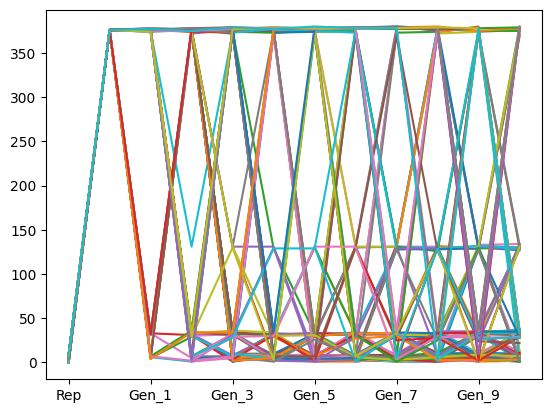

In [19]:
w2.transpose().plot(kind='line',legend=False)

0
1
2
3
4
5
6
7
8
9


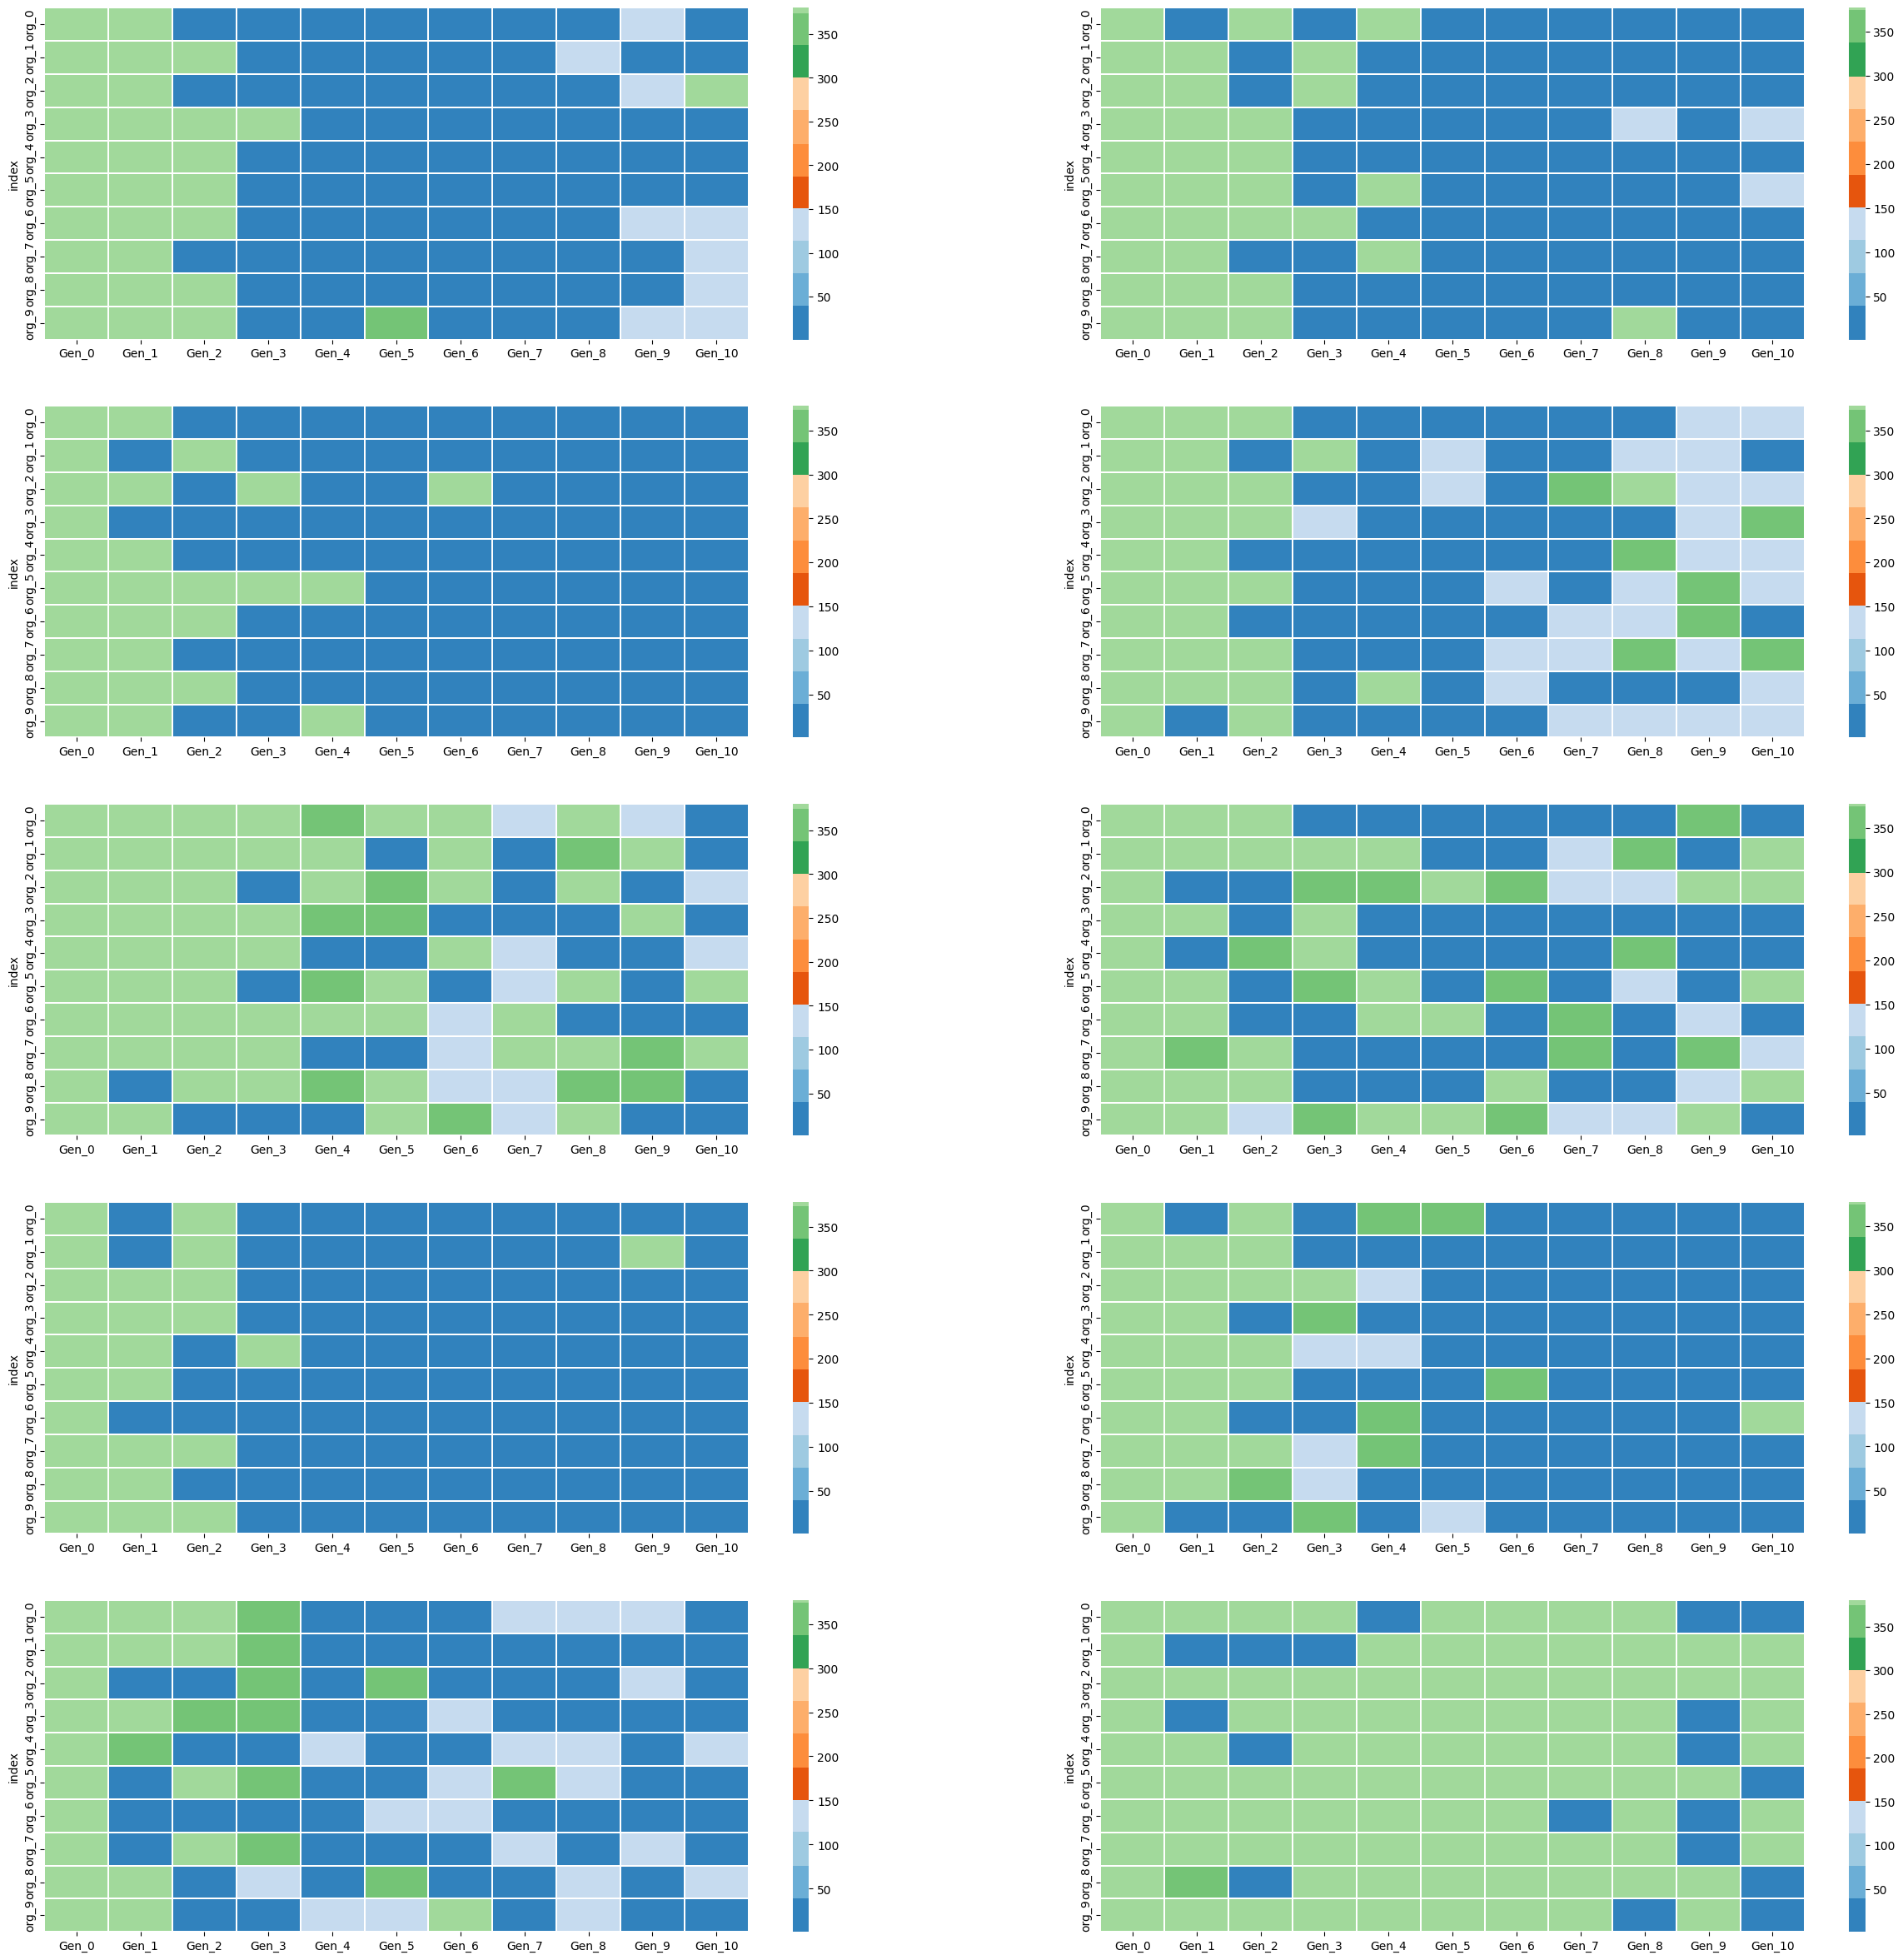

In [21]:
fig, axs = plt.subplots(nrows=5,ncols=2,figsize=(30,30))
count=0
for i in range(5):
    for j in range(2):
        _=w2[w2.Rep==count]
        _=_.iloc[:,1:]
        sbn.heatmap(data=_,cmap='tab20c',linewidths=0.2,ax=axs[i,j],center=375,linecolor='w')
        print(count)
        count+=1


<AxesSubplot: >

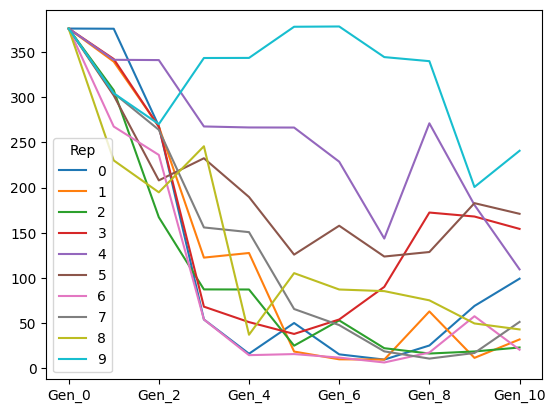

In [22]:
w2.groupby('Rep').mean().transpose().plot(kind='line')